# Evaluación del modelo con nuevos datos
Este notebook permite cargar el modelo entrenado y probarlo con datos nuevos que nunca ha visto.

In [1]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Cargar el modelo entrenado
modelo = joblib.load('../models/random_forest_emg.pkl')
print('Modelo cargado correctamente')

Modelo cargado correctamente


## Cargar y preparar los nuevos datos
Reemplaza la ruta y el nombre del archivo por el de tus nuevos datos.

In [5]:
# 3. Cargar nuevos datos
df_nuevos = pd.read_parquet('../data/processed/final_feature_data_sujeto_02.parquet')
X_nuevos = df_nuevos.drop('Clase', axis=1)
y_nuevos = df_nuevos['Clase']

## Realizar predicciones y evaluar el desempeño

In [8]:
# 3.4 Codificar las etiquetas de texto a números para poder comparar
# ¡Importante! El modelo devolverá números, así que necesitamos la "verdad" también en números.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Como las clases son las mismas que en el entrenamiento, podemos ajustar el encoder aquí
y_verdadero_numeros = label_encoder.fit_transform(y_nuevos)

print("\nDatos nuevos listos para la evaluación.")
display(X_nuevos.head())


Datos nuevos listos para la evaluación.


,RMS_EXG Channel 0,WL_EXG Channel 0,RMS_EXG Channel 1,WL_EXG Channel 1,RMS_EXG Channel 2,WL_EXG Channel 2,RMS_EXG Channel 3,WL_EXG Channel 3,RMS_EXG Channel 4,WL_EXG Channel 4,RMS_EXG Channel 5,WL_EXG Channel 5,RMS_EXG Channel 6,WL_EXG Channel 6,RMS_EXG Channel 7,WL_EXG Channel 7
1,1.681798,0.015997,2.426370,0.010988,2.830325,0.003710,3.424405,0.086800,5.703254,0.825522,2.036158,0.064469,5.242950,0.011805,3.277555,0.010444
2,1.697077,0.069443,2.450020,0.086765,2.793813,0.112861,3.368360,0.214154,5.702092,1.226814,1.975481,0.219977,5.213724,0.094072,3.293612,0.053165
3,1.712990,0.102084,2.470566,0.121323,2.748542,0.224160,3.349339,0.252396,5.506567,2.053436,1.936887,0.251947,5.180929,0.167578,3.306846,0.073904
4,1.713758,0.145128,2.469203,0.188788,2.742490,0.334287,3.365143,0.388406,5.435332,2.320823,1.947780,0.426510,5.170970,0.217250,3.305966,0.117691
5,1.713599,0.149150,2.467432,0.193969,2.740779,0.348346,3.372923,0.404474,5.517601,3.092089,1.959197,0.451070,5.165982,0.227273,3.304081,0.125501


In [10]:
# 4. Predecir y evaluar
y_pred_nuevos = modelo.predict(X_nuevos)
print('Accuracy:', accuracy_score(y_nuevos, y_pred_nuevos))
print('Reporte de clasificación:')
print(classification_report(y_nuevos, y_pred_nuevos))

Accuracy: 0.12648328167360623
Reporte de clasificación:
              precision    recall  f1-score   support

    adelante       0.00      0.00      0.00     15359
       atras       0.56      0.00      0.00     15359
       basal       0.01      0.01      0.01     30719
     derecha       0.22      0.95      0.36     15359
   izquierda       0.00      0.00      0.00     15359
      reposo       0.88      0.00      0.00     26248

    accuracy                           0.13    118403
   macro avg       0.28      0.16      0.06    118403
weighted avg       0.30      0.13      0.05    118403



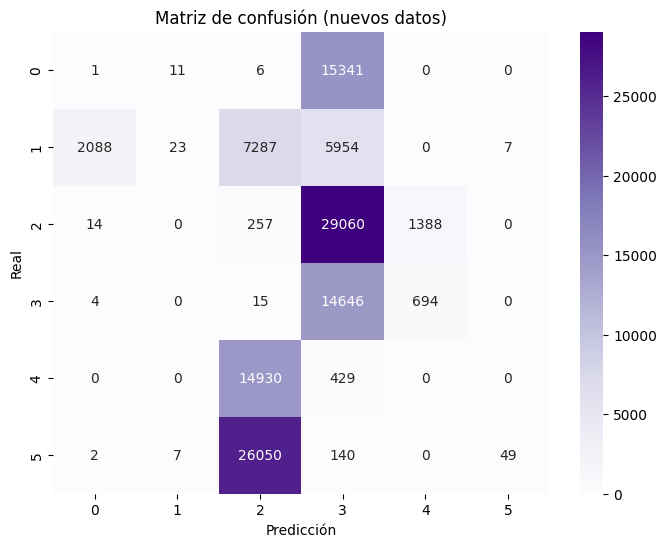

In [12]:
# 5. Matriz de confusión
cm_nuevos = confusion_matrix(y_nuevos, y_pred_nuevos)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nuevos, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión (nuevos datos)')
plt.show()